In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install statsmodels==0.12.0

     |████████████████████████████████| 9.5 MB 7.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
%cp /content/drive/MyDrive/CSVs/* ./

In [119]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.graphics.gofplots import qqplot

In [120]:
from pandas_datareader import data as pdr
from datetime import datetime

In [171]:
df = pd.read_csv('/content/ITC_stock.csv')

In [172]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-01-01,283.549988,279.799988,282.200012,282.700012,2490548.0,250.739075
1,2019-01-02,283.250000,277.549988,282.250000,280.600006,9934187.0,248.876465
2,2019-01-03,282.450012,277.750000,280.600006,278.850006,6114946.0,247.324326
3,2019-01-04,282.950012,279.149994,279.149994,280.950012,7805148.0,249.186951
4,2019-01-07,285.250000,281.000000,284.299988,281.649994,9757529.0,249.807800


In [173]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
237,2019-12-24,240.199997,238.199997,239.000000,238.750000,7896150.0,215.814545
238,2019-12-26,239.399994,236.350006,238.899994,236.800003,14460325.0,214.051880
239,2019-12-27,238.449997,236.449997,237.500000,236.899994,8712539.0,214.142242
240,2019-12-30,240.899994,237.500000,238.000000,238.199997,13173134.0,215.317352
241,2019-12-31,238.949997,237.399994,238.550003,237.699997,7142051.0,214.865402


#**Stock Return Analysis**

In [174]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [175]:
close = df['Close']
date_rng  =  pd.date_range(end='2019-12-31', periods=253, freq='B')

In [176]:
df=pd.DataFrame(close.values,columns=['Close'])
df['TimeIndex'] = pd.DataFrame(date_rng, columns=['B-Days'])

In [177]:
df

,Close,TimeIndex
0,282.700012,2019-01-11
1,280.600006,2019-01-14
2,278.850006,2019-01-15
3,280.950012,2019-01-16
4,281.649994,2019-01-17
...,...,...
237,238.750000,2019-12-10
238,236.800003,2019-12-11
239,236.899994,2019-12-12
240,238.199997,2019-12-13


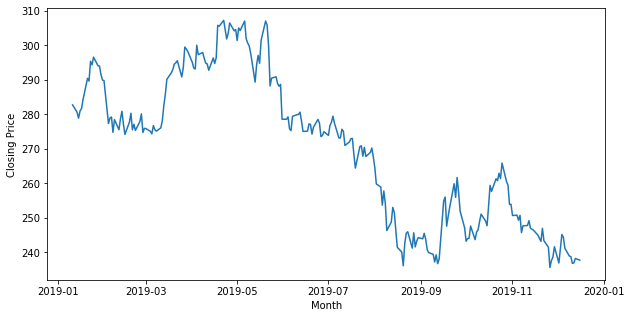

In [178]:
plt.figure(figsize=(10, 5))
plt.plot(df.TimeIndex, df.Close)
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.show()

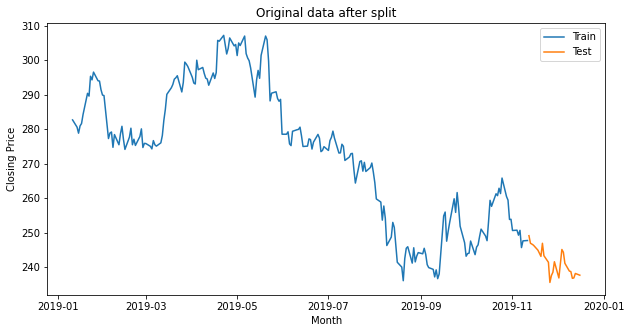

In [179]:
train = df[0:int(len(df)*0.9)] 
test= df[int(len(df)*0.9):]

plt.figure(figsize=(10, 5))
plt.plot(train.TimeIndex, train.Close, label = 'Train')
plt.plot(test.TimeIndex, test.Close,  label = 'Test')

plt.legend(loc = 'best')
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.title('Original data after split')
plt.show()

In [180]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [181]:
from sklearn.metrics import  mean_squared_error

In [182]:
# create class
model = SimpleExpSmoothing(np.asarray(train['Close']))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


For alpha = 0.00,  RMSE is 41.1916 


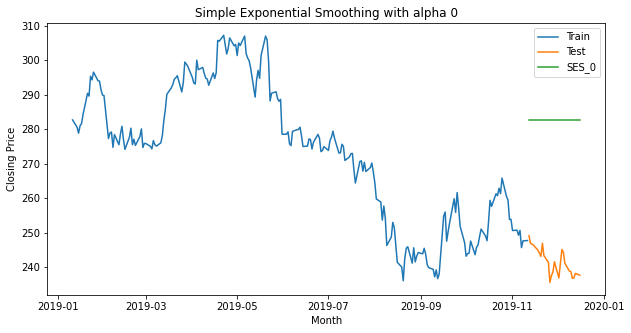

In [183]:
alpha_value = 0

pred_SES = test.copy() 

alpha_str =  "SES_" + str(alpha_value)
mode_fit_i  =  model.fit(smoothing_level = alpha_value, optimized=False)
pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Close']))
rmse =  np.sqrt(mean_squared_error(test['Close'], pred_SES[alpha_str]))


print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))
plt.figure(figsize=(10,5))
plt.plot(train.TimeIndex, train['Close'], label ='Train')
plt.plot(test.TimeIndex, test['Close'], label  ='Test')
plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.legend(loc='best') 
plt.show()

For alpha = 0.10,  RMSE is 11.1161 


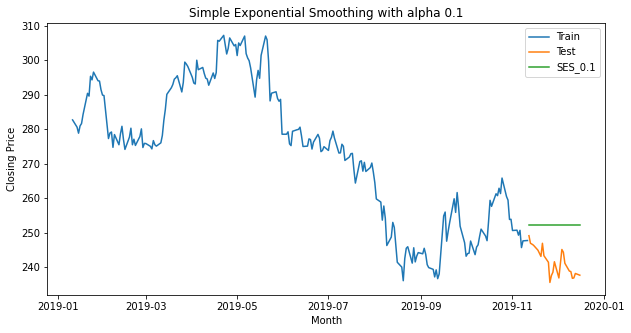

In [184]:
alpha_value = 0.1

pred_SES = test.copy() 

alpha_str =  "SES_" + str(alpha_value)
mode_fit_i  =  model.fit(smoothing_level = alpha_value, optimized=False)
pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Close']))
rmse =  np.sqrt(mean_squared_error(test['Close'], pred_SES[alpha_str]))


print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))
plt.figure(figsize=(10,5))
plt.plot(train.TimeIndex, train['Close'], label ='Train')
plt.plot(test.TimeIndex, test['Close'], label  ='Test')
plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.legend(loc='best') 
plt.show()

For alpha = 0.50,  RMSE is 7.2658 


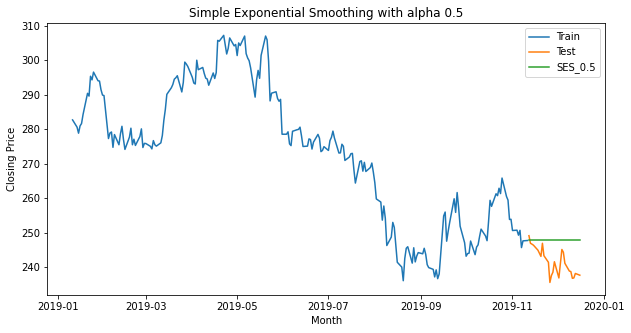

In [185]:
alpha_value = 0.5

pred_SES = test.copy() 

alpha_str =  "SES_" + str(alpha_value)
mode_fit_i  =  model.fit(smoothing_level = alpha_value, optimized=False)
pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Close']))
rmse =  np.sqrt(mean_squared_error(test['Close'], pred_SES[alpha_str]))


print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))
plt.figure(figsize=(10,5))
plt.plot(train.TimeIndex, train['Close'], label ='Train')
plt.plot(test.TimeIndex, test['Close'], label  ='Test')
plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.legend(loc='best') 
plt.show()

For alpha = 0.90,  RMSE is 7.1756 


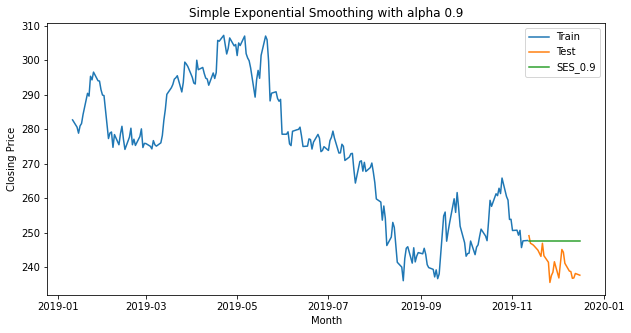

In [186]:
alpha_value = 0.9

pred_SES = test.copy() 

alpha_str =  "SES_" + str(alpha_value)
mode_fit_i  =  model.fit(smoothing_level = alpha_value, optimized=False)
pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Close']))
rmse =  np.sqrt(mean_squared_error(test['Close'], pred_SES[alpha_str]))


print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))
plt.figure(figsize=(10,5))
plt.plot(train.TimeIndex, train['Close'], label ='Train')
plt.plot(test.TimeIndex, test['Close'], label  ='Test')
plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.legend(loc='best') 
plt.show()

For alpha = 0.99,  RMSE is 7.1953 


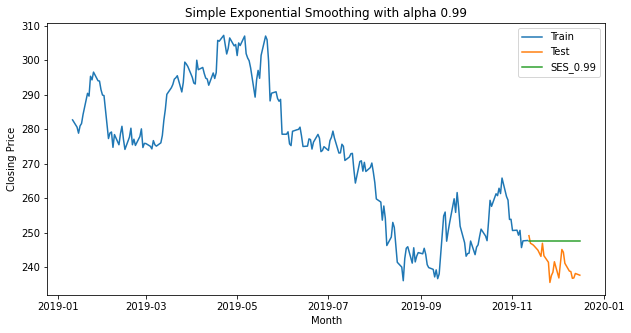

In [187]:
alpha_value = 0.99

pred_SES = test.copy() 

alpha_str =  "SES_" + str(alpha_value)
mode_fit_i  =  model.fit(smoothing_level = alpha_value, optimized=False)
pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Close']))
rmse =  np.sqrt(mean_squared_error(test['Close'], pred_SES[alpha_str]))


print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))
plt.figure(figsize=(10,5))
plt.plot(train.TimeIndex, train['Close'], label ='Train')
plt.plot(test.TimeIndex, test['Close'], label  ='Test')
plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.legend(loc='best') 
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,



Simple Exponential Smoothing 


Smoothing Level 0.9624
Initial Level 282.6187

For alpha = 0.96,  RMSE is 7.1910 


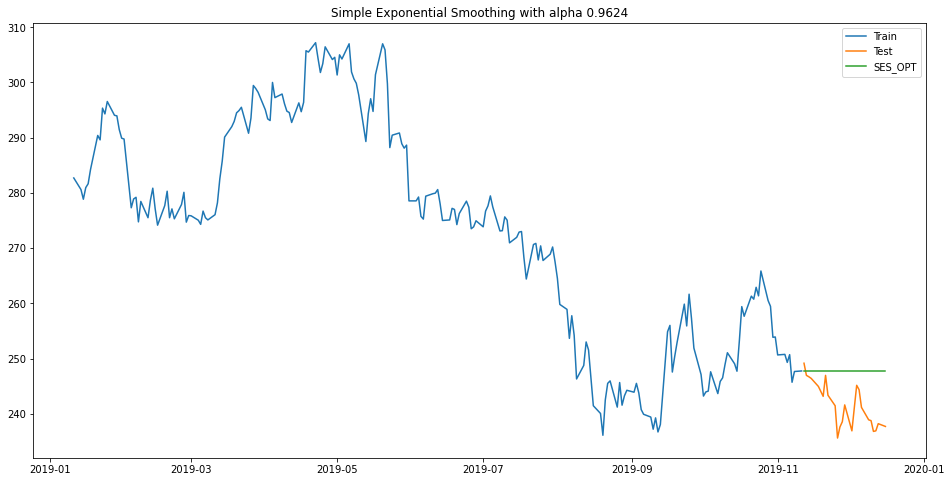

              217         218         219         220         221
Y_hat  247.743747  247.743747  247.743747  247.743747  247.743747
Y      249.149994  246.949997  246.699997  246.399994  244.949997


In [189]:
pred_opt   =  SimpleExpSmoothing(train['Close']).fit(optimized = True)
print('')
print('Simple Exponential Smoothing ')
print('')

print('')
print('Smoothing Level', np.round(pred_opt.params['smoothing_level'], 4))
print('Initial Level',   np.round(pred_opt.params['initial_level'], 4))
print('')

y_pred_opt           = pred_opt.forecast(steps = 25)
df_pred_opt          = pd.DataFrame({'Y_hat':y_pred_opt,'Y':test['Close'].values})

rmse_opt             =  np.sqrt(mean_squared_error(test['Close'], y_pred_opt))

alpha_value          = np.round(pred_opt.params['smoothing_level'], 4)

print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse_opt))

plt.figure(figsize=(16,8))
plt.plot(train.TimeIndex, train['Close'], label = 'Train')
plt.plot(test.TimeIndex, test['Close'],  label = 'Test')
plt.plot(test.TimeIndex, y_pred_opt,           label = 'SES_OPT')
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.legend(loc='best') 
plt.show()

print(df_pred_opt.head().T)

# **Holt’s Method**

In [190]:
from   statsmodels.tsa.holtwinters import  Holt
model_holt = Holt(np.asarray(train['Close']))

model_fit = model_holt.fit()

print('')
print('==Holt model Exponential Smoothing Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
print('Smoothing Level', alpha_value)
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


==Holt model Exponential Smoothing Parameters ==

Smoothing Level 0.9599
Initial Level 282.7816



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [191]:
Pred_Holt = test.copy()

Pred_Holt['Opt'] = model_fit.forecast(len(test['Close']))

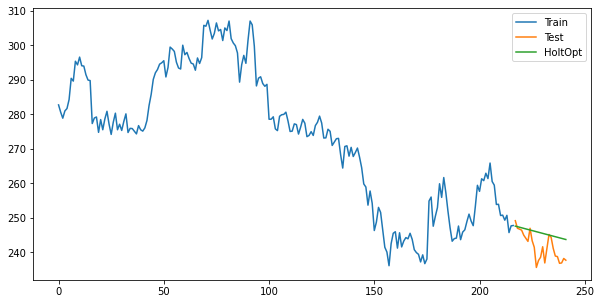

In [192]:
plt.figure(figsize=(10,5))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(Pred_Holt['Opt'], label='HoltOpt')
plt.legend(loc='best')
plt.show()

In [193]:
df_pred_opt =  pd.DataFrame({'Y_hat':Pred_Holt['Opt'] ,'Y':test['Close'].values})
rmse_opt =  np.sqrt(mean_squared_error(df_pred_opt.Y, df_pred_opt.Y_hat))

print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse_opt))

For alpha = 0.96,  RMSE is 5.0336 


# **Holt-Winters’ Method**

In [195]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

pred1 = ExponentialSmoothing(np.asarray(train['Close']), trend='additive', damped_trend=False, seasonal='additive',
                                  seasonal_periods = 74).fit()
alpha_value = np.round(pred1.params['smoothing_level'], 4)
### Forecast for next 16 months

y_pred1 =  pred1.forecast(steps = 25)
df_pred1 = pd.DataFrame({'Y_hat':y_pred1,'Y':test['Close']})

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


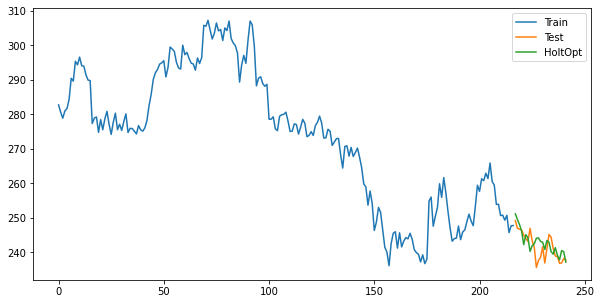

In [196]:
plt.figure(figsize=(10,5))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(df_pred1.Y_hat, label='HoltOpt')
plt.legend(loc='best')
plt.show()

In [197]:
rmse =  np.sqrt(mean_squared_error(df_pred1.Y, df_pred1.Y_hat))

print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))

For alpha = 0.97,  RMSE is 3.3342 
